In [1]:
import sys
sys.path.append("..")

from src.eval.Run import Run

In [2]:
RESULTS = [
    "2025-08-06_13-01-33_librispeech-pc-test-clean_tiny",
    "2025-08-06_13-01-45_librispeech-pc-test-clean_medium",
    "2025-08-06_13-01-45_librispeech-pc-test-clean_small",
    "2025-08-06_13-01-48_librispeech-pc-test-clean_large",
    "2025-08-06_18-17-53_librispeech-pc-test-clean_large-v3",
    "2025-08-06_18-17-37_librispeech-pc-test-clean_large-v3-turbo",
]
runs = [Run.from_directory("../out/" + result) for result in RESULTS]

Loading samples: 100%|██████████| 83/83 [00:00<00:00, 758447.13it/s]


In [3]:
for run in runs:
    run.build_metrics()

Processing samples: 100%|██████████| 83/83 [00:58<00:00,  1.41it/s]


In [4]:
import pandas as pd
df = pd.DataFrame({
    "model": [result.split("_")[-1] for result in RESULTS]
})

In [5]:
df["wer"] = [run.wer for run in runs]
df["wff_latency"] = [run.wff_latency for run in runs]
df["wfc_latency"] = [run.wfc_latency for run in runs]

In [6]:
df

,model,wer,wff_latency,wfc_latency
0,tiny,0.106388,12.589397,1.110647
1,medium,0.036411,8.438728,2.622178
2,small,0.051359,11.210892,1.588120
3,large,0.026395,5.592742,2.755469
4,large-v3,0.025838,5.511357,2.876569
5,large-v3-turbo,0.106883,11.599851,2.208536


In [7]:
from src.eval.utils.draw_alignments import draw

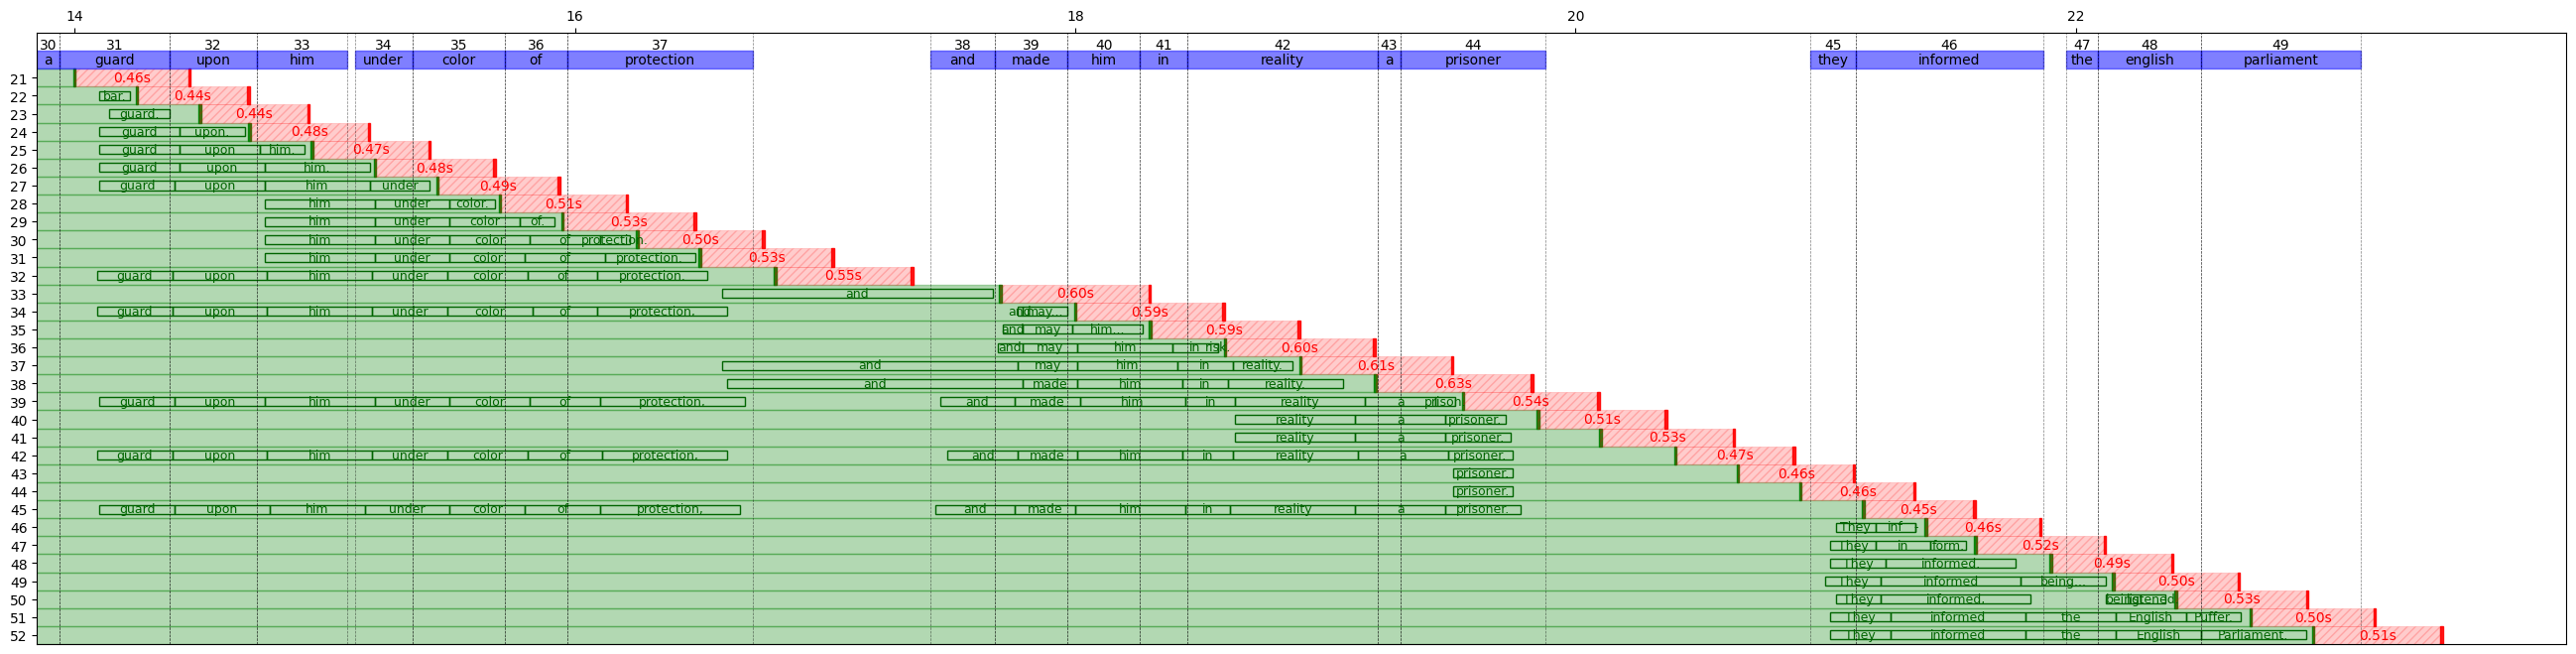

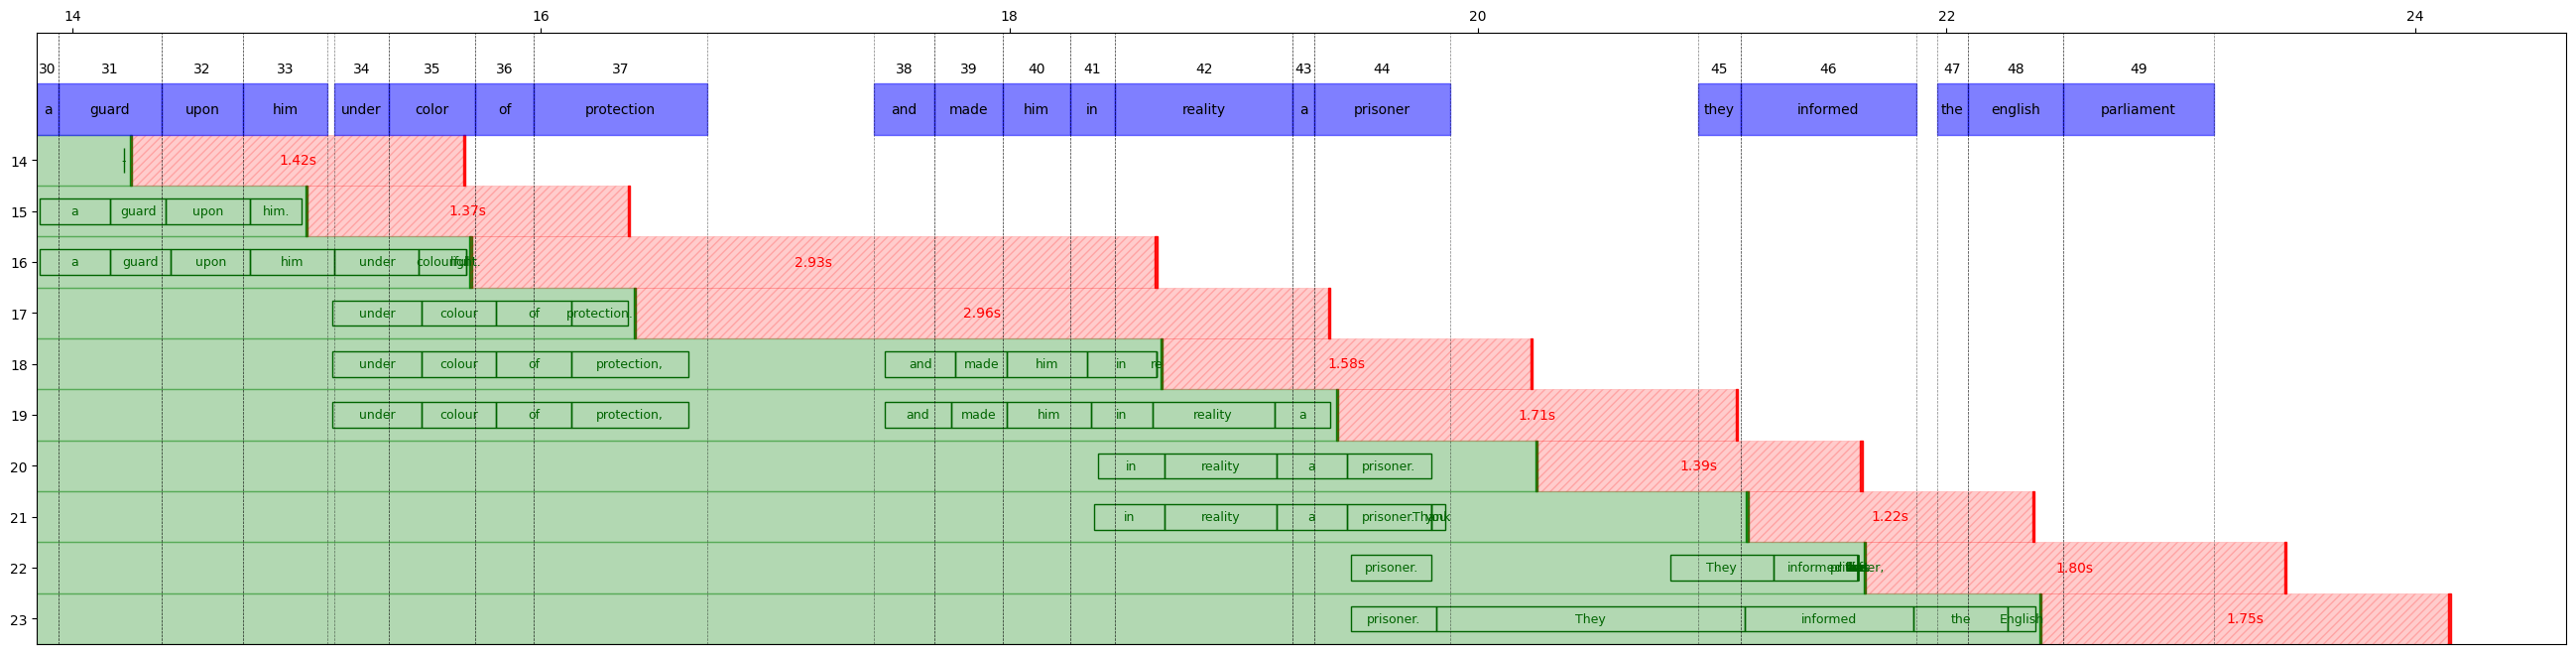

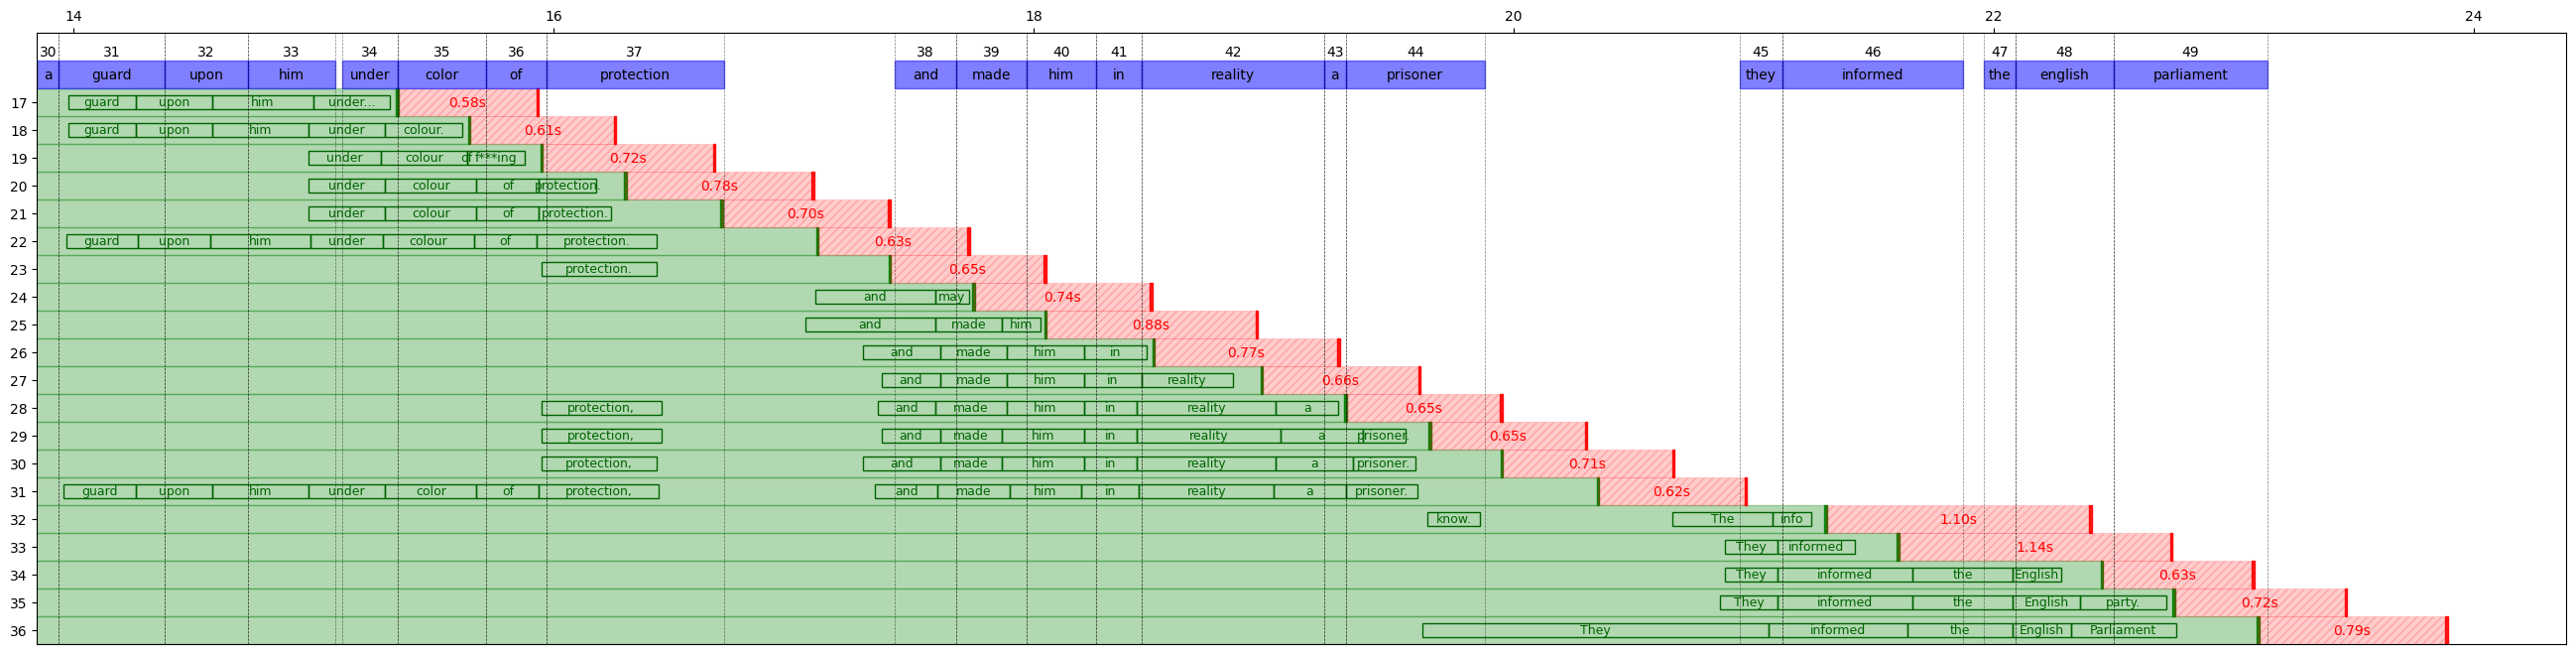

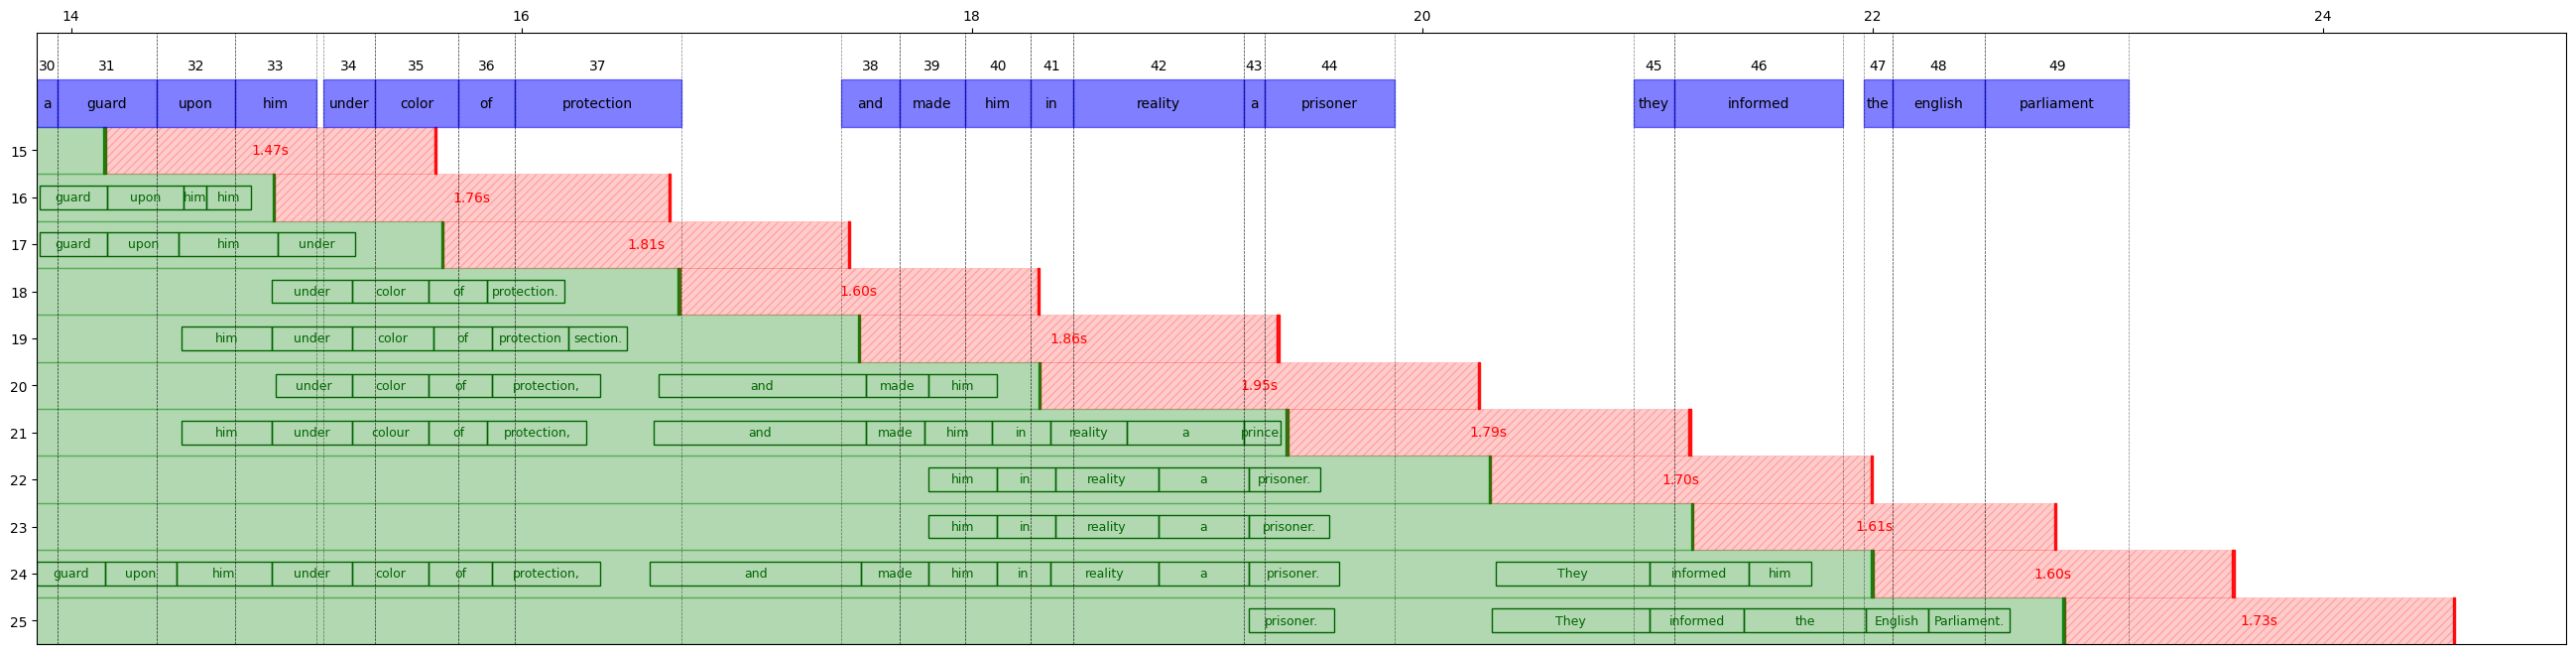

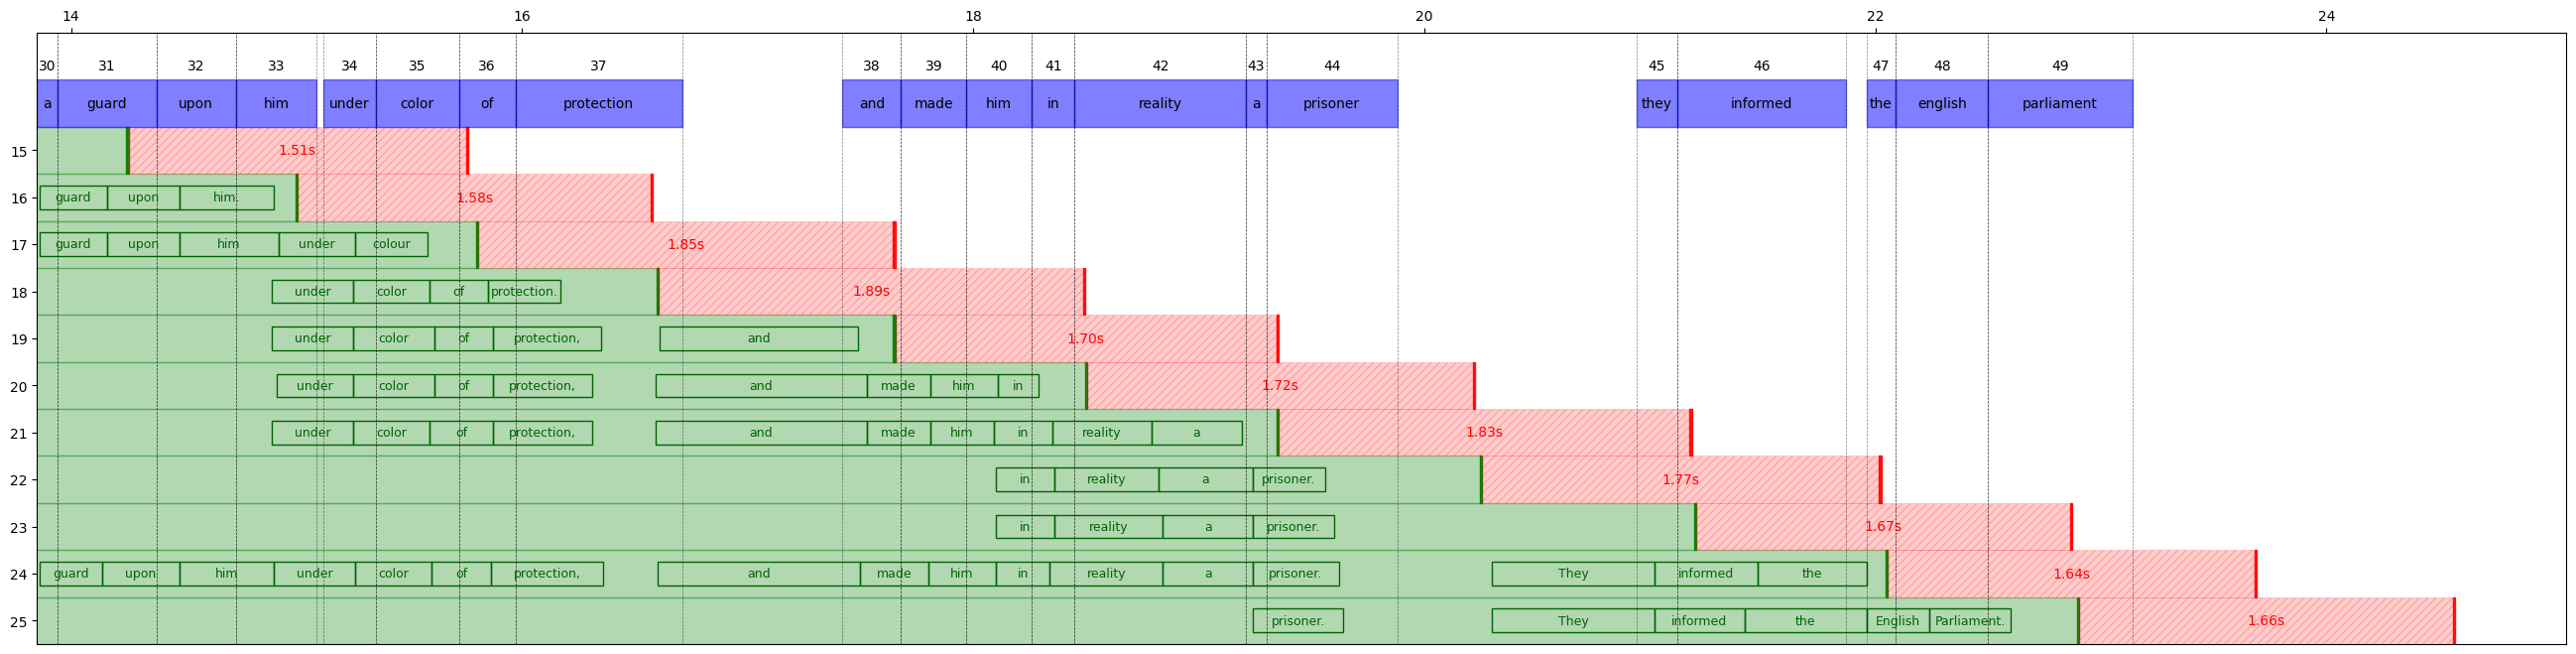

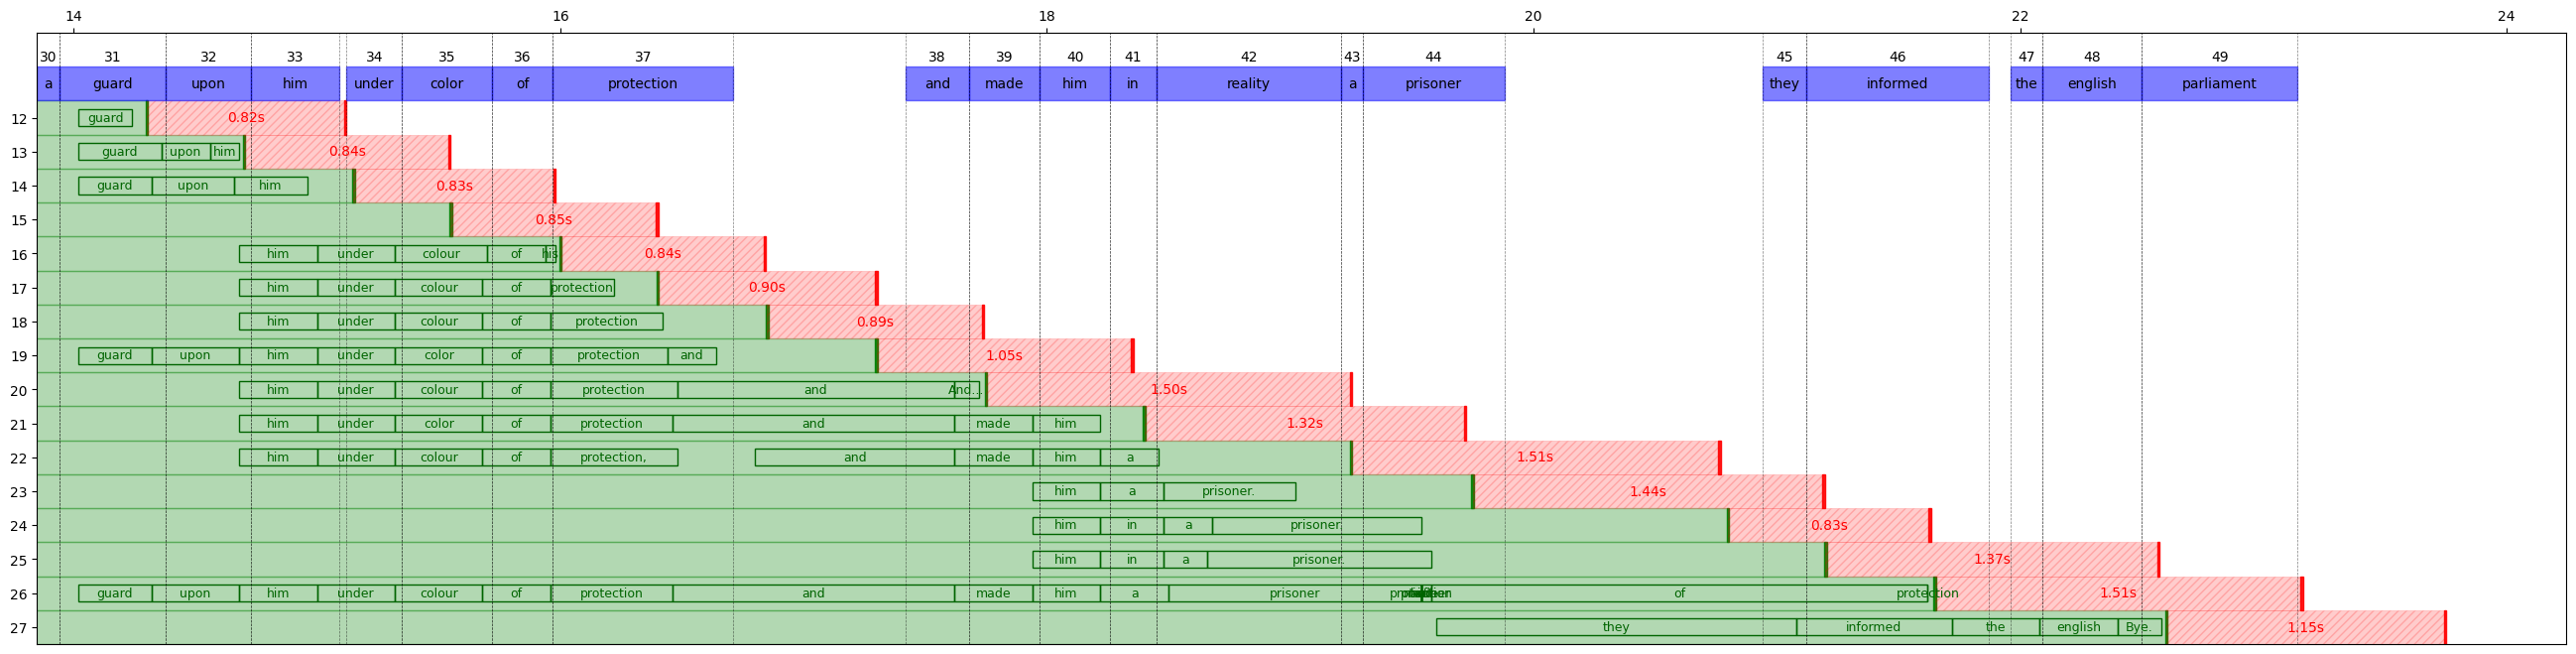

In [8]:
for i in range(len(runs)):
    draw(runs[i].samples[0], 30, 20, alignment=None)

In [9]:
from matplotlib import pyplot as plt

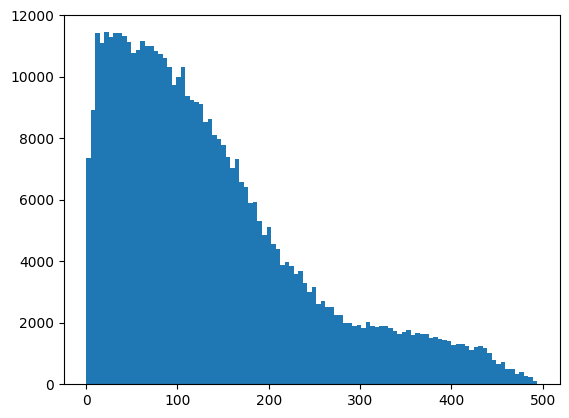

In [10]:
run = runs[0]
word_starts = []
for sample in run.samples:
    for pt in sample.partials:
        for word in pt.result:
            word_starts.append(word.start)

plt.hist(word_starts, bins=100)
plt.show()

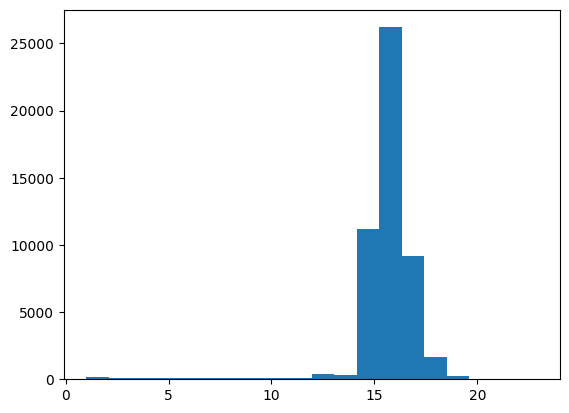

In [11]:
run = runs[0]
window_size = []
for sample in run.samples:
    for pt in sample.partials:
        window_size.append(pt.window[1] - pt.window[0])

plt.hist(window_size, bins=20)
plt.show()

In [25]:
from src.helper.word_sequence import word_sequence_to_string

run = runs[0]
sample = run.samples[0]

y = word_sequence_to_string(sample.baseline)
y_final = word_sequence_to_string(sample.final)

for fm in sample.final_messages:
    print(f"{fm.observation_time:6.2f}: {fm.reason:<20} {word_sequence_to_string(fm.result)}")

  5.15: threshold reached    The Scottish Generals and Commissioners affected great
  7.17: threshold reached    great surprise on the appearance of the King.
 10.23: threshold reached    King, and though they paid him all the
 12.45: threshold reached    the exterior respect due to his dignity.
 13.76: sentence end         dignity, they instantly...
 15.68: sentence end         instantly set a guard upon him.
 17.03: sentence end         him under color of protection.
 19.83: sentence end         and and may him in reality.
 20.63: sentence end         reality a prisoner.
 21.36: sentence end         prisoner.
 24.89: threshold reached    They informed being English Parliament of this
 26.18: sentence end         this unexpected incident.
 28.76: threshold reached    and sure them that they had entered into
 30.73: threshold reached    into no private treaty with the king.
 31.86: sentence end         or Hath.
 35.79: threshold reached    he given us any gift and the
 36.30: sentence 

In [27]:
for pt in sample.partials:
    print(f"{pt.window[0]:6.2f} - {pt.window[1]:6.2f} {word_sequence_to_string(pt.result)}")

  0.00 -   1.00 The Scotty
  0.00 -   2.00 The Scottish Generals and
  0.00 -   3.00 The Scottish Generals and Commissioners of
  0.00 -   4.00 The Scottish Generals and Commissioners affected great sub
  0.00 -   5.00 The Scottish Generals and Commissioners affected great surprise on the appeal.
  0.00 -   6.00 great surprise on the appearance of the King.
  0.00 -   7.00 great surprise on the appearance of the King.
  0.00 -   8.00 The Scottish Generals and Commissioners affected great surprise on the appearance of the King, and though they paid him.
  0.00 -   9.00 King, and though they paid him all the ex...
  0.00 -  10.00 King, and though they paid him all the exterior respect.
  0.00 -  11.00 the exterior respect due to...
  0.00 -  12.00 the exterior respect due to his dignity.
  0.00 -  12.05 the exterior respect due to his dignity.
  0.00 -  12.25 The Scottish Generals and Commissioners affected great surprise on the appearance of the King, and though they paid him all the ex